In [76]:
import matplotlib.pyplot as pyplot
%matplotlib inline
import numpy as np
import sympy
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [77]:
# True present value of a finite lease
def finite_lease_pv_true(T, g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return (x_0 * (1 - G**(T + 1) * R**(-T - 1))) / (1 - G * R**(-1))
# First approximation for our finite lease

def finite_lease_pv_approx_1(T, g, r, x_0):
    p = x_0 * (T + 1) + x_0 * r * g * (T + 1) / (r - g)
    return p

# Second approximation for our finite lease
def finite_lease_pv_approx_2(T, g, r, x_0):
    return (x_0 * (T + 1))

# Infinite lease
def infinite_lease(g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return x_0 / (1 - G * R**(-1))

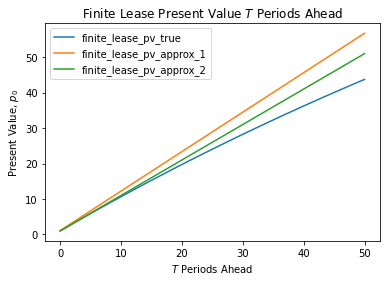

In [78]:
series_end = 50
T = np.arange(0, series_end+1)

#g, r = 0.02, 0.03 #example
g = 0.0240 #my average lease increase over the past 5 years
r = 0.0305 #current 30 year fixed rate
x_0 = 1

our_args = (T, g, r, x_0)
funcs = [finite_lease_pv_true,
        finite_lease_pv_approx_1,
        finite_lease_pv_approx_2]
        #infinite_lease]

figure, axes = pyplot.subplots()
for f in funcs:
    axes.plot(T, f(*our_args), label=f.__name__)

axes.legend()
axes.set_title('Finite Lease Present Value $T$ Periods Ahead')
axes.set_xlabel('$T$ Periods Ahead')
axes.set_ylabel('Present Value, $p_0$')
pyplot.show()

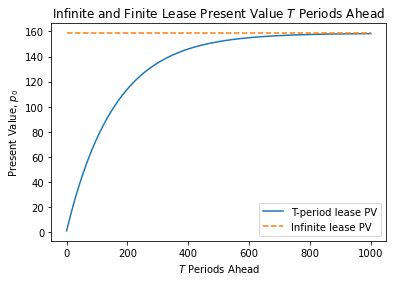

In [79]:
# Convergence of infinite and finite
series_end = 1000
T = np.arange(0,series_end+1)

#g, r = 0.02, 0.03 #example
g = 0.0240 #my average lease increase over the past 5 years
r = 0.0305 #current 30 year fixed rate

f_1 = finite_lease_pv_true(T, g, r, x_0)
f_2 = np.ones(series_end+1)*infinite_lease(g, r, x_0)

figure, axes = pyplot.subplots()
axes.plot(T, f_1, label='T-period lease PV')
axes.plot(T, f_2, '--', label='Infinite lease PV')

axes.legend()
axes.set_title('Infinite and Finite Lease Present Value $T$ Periods Ahead')
axes.set_xlabel('$T$ Periods Ahead')
axes.set_ylabel('Present Value, $p_0$')
pyplot.show()

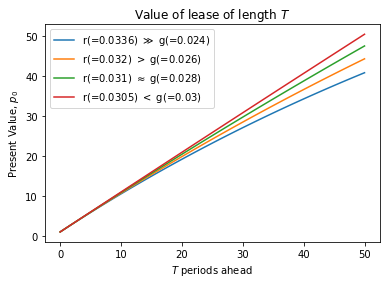

In [80]:
series_end = 50

T=np.arange(0, series_end+1)
#rs, gs = (0.9, 0.5, 0.4001, 0.4), (0.4, 0.4, 0.4, 0.5), #example
rs, gs = (0.0336, 0.032, 0.031, 0.0305), (0.0240, 0.026, 0.028, 0.03)
comparisons = ('$\gg$', '$>$', r'$\approx$', '$<$')

figure, axes = plt.subplots()
for r, g, comp in zip(rs, gs, comparisons):
    axes.plot(finite_lease_pv_true(T, g, r, x_0), label=f'r(={r}) {comp} g(={g})')

axes.legend()
axes.set_title('Value of lease of length $T$')
axes.set_ylabel('Present Value, $p_0$')
axes.set_xlabel('$T$ periods ahead')
pyplot.show()

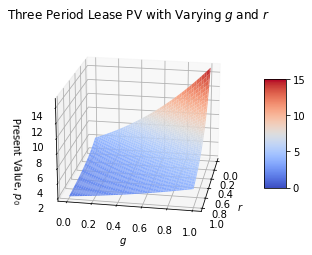

In [81]:
# Second view
figure = pyplot.figure()
T = 3
axes = figure.gca(projection='3d')


r = np.arange(0.001, 0.99, 0.003)
g = np.arange(0.0011, 0.999, 0.003)
#r = np.arange(0.01, 0.99, 0.005) #example
#g = np.arange(0.011, 0.991, 0.005) #example

rr, gg = np.meshgrid(r, g)
z = finite_lease_pv_true(T, gg, rr, x_0)

# Removes points where undefined
same = (rr == gg)
z[same] = np.nan
surface = axes.plot_surface(rr, gg, z, cmap=cm.coolwarm,
    antialiased=True, clim=(0, 15))
figure.colorbar(surface, shrink=0.5, aspect=5)

axes.set_title('Three Period Lease PV with Varying $g$ and $r$')
axes.set_xlabel('$r$')
axes.set_ylabel('$g$')
axes.set_zlabel('Present Value, $p_0$')
axes.view_init(20, 10)
pyplot.show()

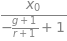

In [87]:
# Creates algebraic symbols that can be used in an algebraic expression
g, r, x0 = sympy.symbols('g, r, x0')
G = (1 + g)
R = (1 + r)
p0 = x0 / (1 - G * R**(-1))
sympy.init_printing()

p0

dp0 / dg is:


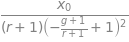

In [88]:
print('dp0 / dg is:')
dp_dg = sympy.diff(p0, g)

dp_dg

dp0 / dr is:


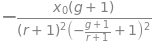

In [89]:
print('dp0 / dr is:')
dp_dr = sympy.diff(p0, r)
dp_dr